### 1) Perform sentimental analysis on the Elon-musk tweets 

In [126]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [127]:
elon_tweet = pd.read_csv("Elon_musk.csv")

In [128]:
def load_words_from_file(filename):
    with open(filename, 'r',encoding='ISO-8859-1') as file:
        words=file.readlines() 
    
    words=[word.strip() for word in words]
    words =[word for word in words if word]
    return words

pos_words = load_words_from_file('C:/Users/LENOVO/OneDrive/Desktop/Data_Science/Data_Science_Assignment/DS-Assignment-11-Tex/positive-words.txt')
neg_words = load_words_from_file('C:/Users/LENOVO/OneDrive/Desktop/Data_Science/Data_Science_Assignment/DS-Assignment-11-Tex/negative-words.txt')
stop_words = load_words_from_file('C:/Users/LENOVO/OneDrive/Desktop/Data_Science/Data_Science_Assignment/DS-Assignment-11-Tex/stop.txt')    


In [129]:
def analyze_sentiment(tweet): 
    words = tweet.lower().split()
    words = [word for word in words if word not in stop_words]
    pos_count = sum(1 for word in words if word in pos_words) 
    neg_count = sum(1 for word in words if word in neg_words) 
    
    if pos_count > neg_count:
        return 'positive' 
    
    elif pos_count < neg_count: 
        return 'negative'
    else:
        return 'neutral'

In [130]:
elon_tweet['sentiment'] = elon_tweet['Text'].apply(analyze_sentiment) 

print(elon_tweet[['Text','sentiment']])

                                                   Text sentiment
0                                @kunalb11 I’m an alien   neutral
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   neutral
2                   @joerogan @Spotify Great interview!  positive
3                       @gtera27 Doge is underestimated   neutral
4     @teslacn Congratulations Tesla China for amazi...  positive
...                                                 ...       ...
1994  @flcnhvy True, it sounds so surreal, but the n...  negative
1995  @PPathole Make sure to read ur terms &amp; con...   neutral
1996                @TeslaGong @PPathole Samwise Gamgee   neutral
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...  negative
1998                          Progress update August 28  positive

[1999 rows x 2 columns]


In [25]:
sentiment_counts = elon_tweet['sentiment'].value_counts()
tweet_total = len(elon_tweet)
tweet_pos_percent = (sentiment_counts.get('positive',0) / tweet_total) * 100 
tweet_neg_percent = (sentiment_counts.get('negative',0) / tweet_total) * 100 
tweet_neutral = (sentiment_counts.get('neutral',0) / tweet_total) * 100

In [29]:
print("Positive tweets in %:", tweet_pos_percent) 
print("Negative tweets in %:", tweet_neg_percent)
print("Neutral Tweets in %:", tweet_neutral)

Positive tweets in %: 20.610305152576288
Negative tweets in %: 11.105552776388194
Neutral Tweets in %: 68.28414207103552


----

### Changes/additions as per reccomendations

In [2]:
elon_tweet = pd.read_csv("Elon_musk.csv")

In [3]:
from wordcloud import WordCloud
from  textblob import TextBlob 

In [4]:
comb_tweet_txt=' '.join(elon_tweet['Text'])

In [5]:
wordcloud = WordCloud(width=800, height=400, background_color='skyblue').generate(comb_tweet_txt)

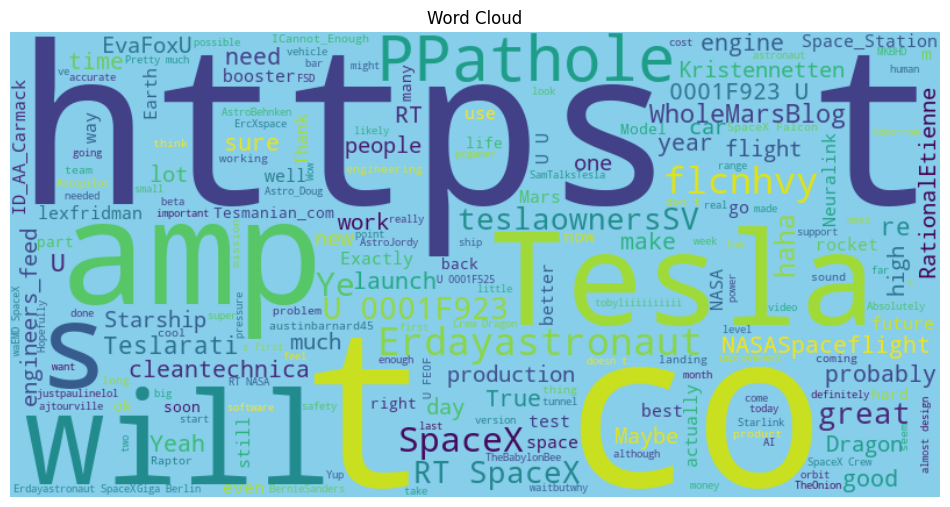

In [6]:
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [7]:
sentiments = [TextBlob(tweet).sentiment.polarity for tweet in elon_tweet['Text']]


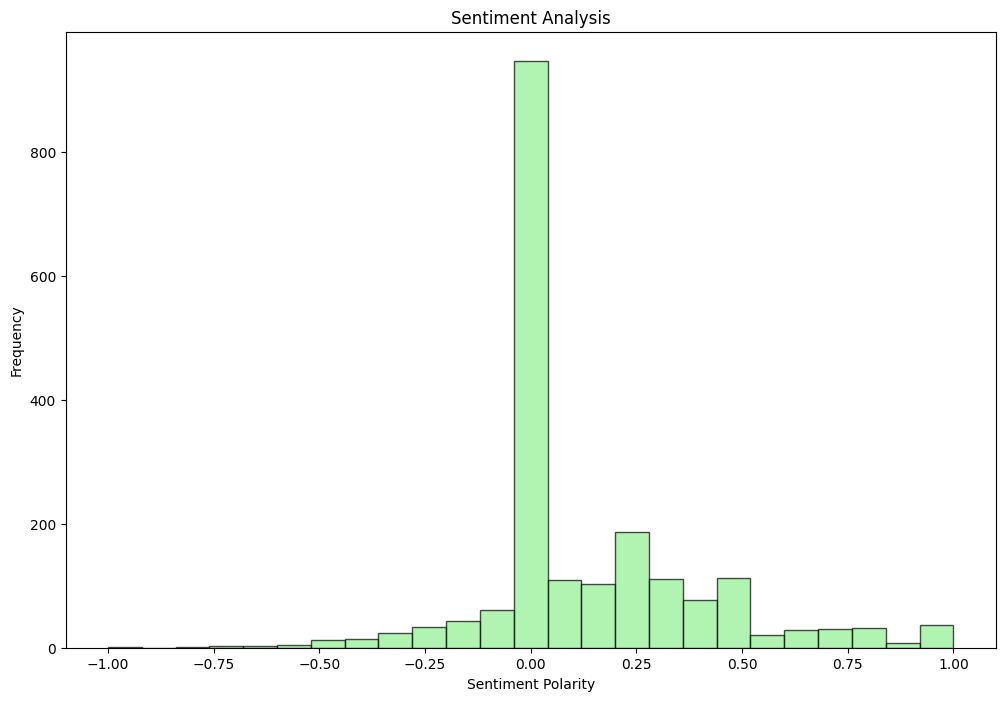

In [8]:
plt.figure(figsize=(12, 8))
plt.hist(sentiments, bins=25, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

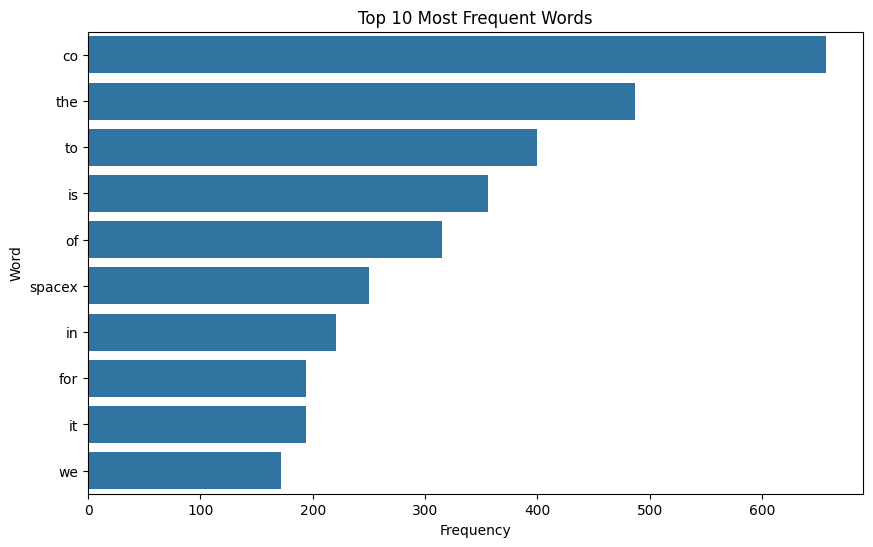

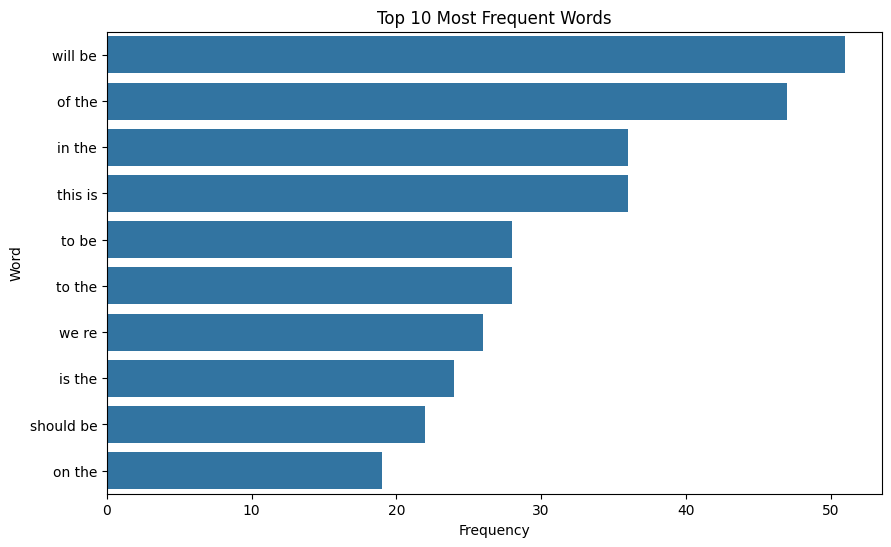

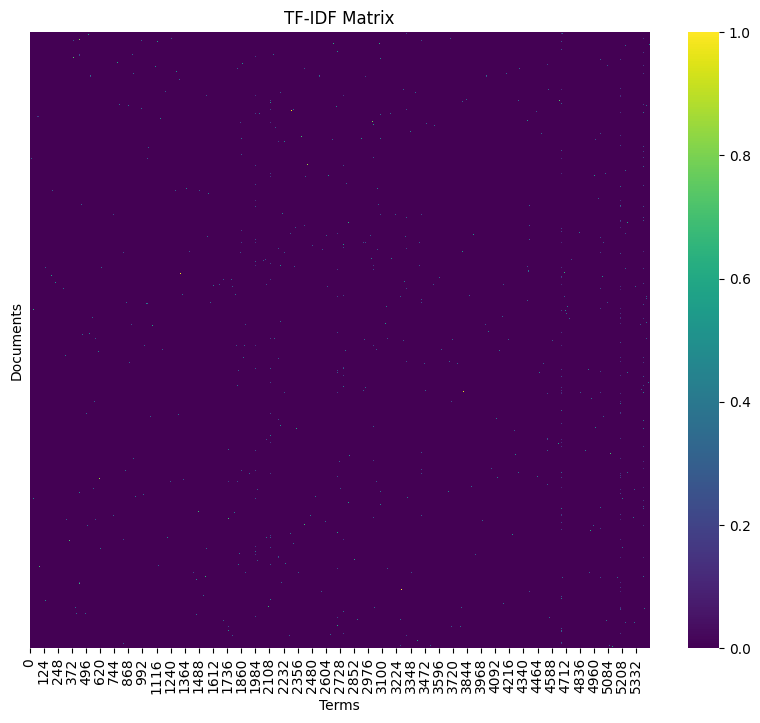

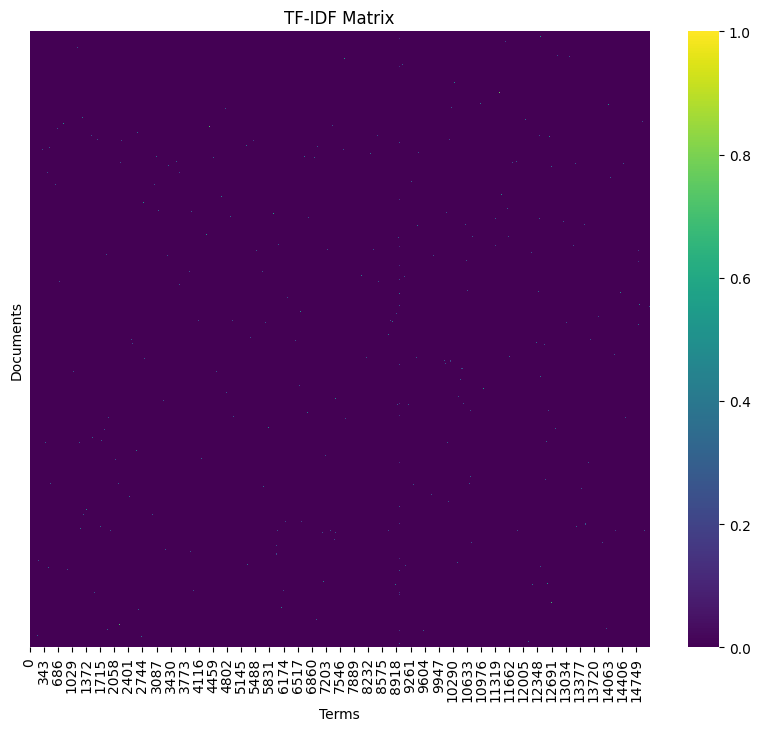

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
import seaborn as sns

# Define function to plot most frequent words
def plot_most_frequent_words(text, n=10, ngram_range=(1, 1)):
    # Create CountVectorizer to get word frequencies
    stop_words = ['https', 'amp', 'rt', '0001f923', '0001f923 0001f923']  # Define stop words to exclude
    vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range)
    X = vectorizer.fit_transform(text)
    word_freq = list(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
    word_freq.sort(key=lambda x: x[1], reverse=True)

    # Plot the most frequent words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[word[1] for word in word_freq[:n]], y=[word[0] for word in word_freq[:n]])
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

# Define function to plot TF-IDF matrix
def plot_tfidf_matrix(text, ngram_range=(1, 1)):
    # Create TF-IDF vectorizer
    stop_words = ['https', 'amp', 'rt', '0001f923', '0001f923 0001f923']  # Define stop words to exclude
    vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=ngram_range)
    X = vectorizer.fit_transform(text)

    # Plot TF-IDF matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(X.toarray(), cmap='viridis', yticklabels=False)
    plt.title('TF-IDF Matrix')
    plt.xlabel('Terms')
    plt.ylabel('Documents')
    plt.show()

# Plot most frequent unigrams
plot_most_frequent_words(elon_tweet['Text'])

# Plot most frequent bigrams
plot_most_frequent_words(elon_tweet['Text'], ngram_range=(2, 2))

# Plot TF-IDF matrix for unigrams
plot_tfidf_matrix(elon_tweet['Text'])

# Plot TF-IDF matrix for bigrams
plot_tfidf_matrix(elon_tweet['Text'], ngram_range=(2, 2))

---

In [182]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [183]:
musk_tweets=pd.read_csv('Elon_musk.csv')
musk_tweets

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [184]:
musk_tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
musk_tweets

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [185]:
! pip install Wordcloud
! pip install wordcloud

In [186]:
! pip install spacey

In [187]:
! pip install spacy

In [188]:
import string 

import spacy
from matplotlib.pyplot import imread 
from wordcloud import WordCloud, STOPWORDS

####  Removing unnecessary characters that could hinder running of code or cause errors

In [189]:
musk_tweets=[Text.strip() for Text in musk_tweets.Text]
musk_tweets=[Text for Text in musk_tweets if Text]
musk_tweets[0:20]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [190]:
musk_tweets_text= ' '.join(musk_tweets)

In [191]:
from nltk.tokenize import TweetTokenizer 
twt_tokenizer=TweetTokenizer(strip_handles=True)
twts_tokens=twt_tokenizer.tokenize(musk_tweets_text)
print(twts_tokens)

['I', '’', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '’', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can', 'be'

In [192]:
twt_token_text= ' '.join(twts_tokens)
twt_token_text

'I ’ m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch th

In [193]:
text_without_punctuations=twt_token_text.translate(str.maketrans('','',string.punctuation))
text_without_punctuations

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway tog

In [194]:
import re 
remov_url=re.sub(r'http\S+', '', text_without_punctuations)
remov_url

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reasonably well

In [195]:
# Tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [256]:
from nltk.tokenize import word_tokenize
txt_tokens=word_tokenize(remov_url)
print(txt_tokens)

['I', '’', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '’', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing', 'Plea

In [257]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [275]:
from nltk.corpus import stopwords

stop_words=stopwords.words('english')

stopw_list= ['\x92', '’','rt','ye','yeah','haha','Yes','U0001F923','I']
stop_words.extend(stopw_list)

remov_stopwds=[word for word in txt_tokens if not word in stop_words]
print(remov_stopwds)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict', 'cash', 'flo

In [276]:
lowercase_words=[Text.lower() for Text in remov_stopwds]
print(lowercase_words[100:300])

['once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', '…', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', '…', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', '…', 'it', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'take', 'table', 'that', 'missing', 'back', 'work', 'go', '…', 'does', 'seem', 'bit', 'high', 'doge', 'appears', 'inflationary', 'meaningfully', 'fixed', 'coins', 'per', 'unit', 'time', 'whereas', '…', 'wow', '1', 'orbital', 'launch', 'tower', 'stack', '2', 'enough', 'raptors', 'orbit', 'booster', '3', 'improve', 'ship', 'booste

In [271]:
! python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.7 MB/s eta 0:00:08
      --------------------------------------- 0.3/12.8 MB 3.5 MB/s eta 0:00:04
     --- ------------------------------------ 1.1/12.8 MB 8.4 MB/s eta 0:00:02
     ------- -------------------------------- 2.5/12.8 MB 16.0 MB/s eta 0:00:01
     ------------- -------------------------- 4.2/12.8 MB 20.6 MB/s eta 0:00:01
     ------------------ --------------------- 5.9/12.8 MB 22.3 MB/s eta 0:00:01
     ----------------------- ---------------- 7.6/12.8 MB 25.4 MB/s eta 0:00:01
     ---------------------------- ----------- 9.0/12.8 MB 26.1 MB/s eta 0:00:01
     ------------------------------- ------- 10.3/12.8 MB 29.7 MB/s eta 0:00:01
     ------------------------------------- - 12.2/12.8 MB 36.4 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 36.4 MB/s eta 0:00:01
     --------------------------------------- 12.8/1

In [277]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lowercase_words]
print(stemmed_tokens[100:200])


['onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', '…', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', '…', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', '…', 'it', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'that', 'miss', 'back', 'work', 'go', '…', 'doe', 'seem', 'bit', 'high', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per', 'unit', 'time', 'wherea', '…', 'wow', '1', 'orbit', 'launch', 'tower', 'stack']


In [279]:
import spacy

In [281]:

nlp=spacy.load('en_core_web_sm')
lowercase_doc=nlp(' '.join(lowercase_words))
print(lowercase_doc)

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however … spacex needs pass deep chasm negative cash flow next year … lowest cost per ton carbon sequestered net value product made must scalable g … it meant price countries only difference taxes shipping this intended 

In [282]:
lemmas_token=[token.lemma_ for token in lowercase_doc]

In [283]:
tweets2=' '.join(lemmas_token)
tweets2

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however … spacex need pass deep chasm negative cash flow next year … low cost per ton carbon sequester net value product make must scalable g … it mean price country only difference taxis ship this intend earth may idea apply mar xprize team manage

In [288]:
musk_tweets2=' '.join(lemmas_token)
musk_tweets2

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however … spacex need pass deep chasm negative cash flow next year … low cost per ton carbon sequester net value product make must scalable g … it mean price country only difference taxis ship this intend earth may idea apply mar xprize team manage

In [289]:
from sklearn.feature_extraction.text import CountVectorizer 
cvert=CountVectorizer()
cvert_musk_tweets=cvert.fit_transform(lemmas_token)
print(cvert.vocabulary_)

{'alien': 194, 'ray': 2342, 'trace': 3007, 'cyberpunk': 766, 'hdr': 1355, 'nextlevel': 1956, 'have': 1350, 'try': 3037, 'great': 1302, 'interview': 1552, 'doge': 889, 'underestimate': 3170, 'congratulation': 674, 'tesla': 2912, 'china': 583, 'amazing': 217, 'execution': 1056, 'last': 1636, 'year': 3387, 'now': 1983, 'next': 1955, 'even': 1030, 'happy': 1337, 'new': 1953, 'ox': 2084, 'frodo': 1206, 'underdoge': 3169, 'all': 197, 'thought': 2949, 'would': 3372, 'fail': 1090, 'himself': 1398, 'haha': 1325, 'thank': 2923, 'indeed': 1493, 'tweet': 3052, 'definitely': 803, 'represent': 2408, 'realworld': 2357, 'time': 2965, 'allocation': 199, 'the': 2928, 'entertaining': 1000, 'outcome': 2063, 'likely': 1691, 'just': 1594, 'send': 2551, 'agree': 179, 'clubhouse': 612, 'it': 1571, 'get': 1264, 'real': 2352, 'buy': 502, 'dogecoin': 891, 'lil': 1692, 'toddler': 2977, 'hodler': 1404, 'he': 1356, 'issue': 1570, 'sentencing': 2556, 'seem': 2543, 'bit': 418, 'high': 1390, 'fix': 1151, 'please': 217

In [290]:

print(cvert.get_feature_names_out()[100:300])

['74' '78' '7th' '90' '9007' '922' '948' '95' '99' 'aber' 'able' 'abo'
 'aboard' 'abort' 'about' 'above' 'absence' 'absolute' 'absolutely'
 'absorb' 'absorption' 'absurd' 'absurdly' 'ac' 'academia' 'accel'
 'accelera' 'accelerate' 'acceleration' 'accelerator' 'accept'
 'acceptable' 'access' 'accessible' 'accident' 'accidental' 'accommodate'
 'account' 'accura' 'accuracy' 'accurate' 'ace' 'achieve' 'achievement'
 'achy' 'acquisition' 'across' 'action' 'active' 'activity' 'actual'
 'actuall' 'actually' 'actuary' 'adagio' 'add' 'additive' 'address'
 'administer' 'adult' 'advanc' 'advance' 'advanced' 'advantage'
 'adventure' 'advertise' 'advice' 'advise' 'aero' 'afb' 'affair' 'affect'
 'affordable' 'africa' 'after' 'afternoon' 'age' 'ago' 'agony' 'agree'
 'ah' 'ahead' 'ahem' 'ai' 'aim' 'air' 'aircraft' 'airplane' 'ak' 'aka'
 'alert' 'alexander' 'algo' 'algorithm' 'alien' 'aliens' 'align' 'all'
 'allocati' 'allocation' 'allow' 'alloy' 'almost' 'aloha' 'alone' 'along'
 'alpha' 'already' 'als

In [315]:
print(cvert_musk_tweets.toarray()[100:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### CountVectorizer and N-grams

In [316]:
cvert_ngram=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=300)
bow_mat_ngram=cvert_ngram.fit_transform(lemmas_token)

In [293]:
print(cvert_ngram.get_feature_names_out())
print(bow_mat_ngram.toarray())

['10' '100' '20' '30' 'absolutely' 'accurate' 'actually' 'add' 'agree'
 'ai' 'all' 'almost' 'also' 'although' 'amazing' 'and' 'appreciate'
 'astronaut' 'autopilot' 'awesome' 'back' 'bad' 'bar' 'battery' 'be'
 'berlin' 'beta' 'big' 'bit' 'boca' 'body' 'booster' 'brain' 'build' 'but'
 'call' 'car' 'cargo' 'change' 'close' 'come' 'company' 'complete'
 'confirm' 'congratulation' 'control' 'cool' 'cost' 'could' 'crew' 'day'
 'definitely' 'design' 'difference' 'different' 'do' 'doge' 'dojo'
 'dragon' 'drive' 'droneship' 'early' 'earth' 'easy' 'electric' 'energy'
 'engine' 'engineering' 'enough' 'even' 'ever' 'exactly' 'fair' 'falcon'
 'far' 'fast' 'feel' 'fire' 'first' 'fix' 'flap' 'flight' 'fly' 'for'
 'fsd' 'full' 'fully' 'fun' 'future' 'game' 'get' 'giga' 'give' 'go'
 'good' 'great' 'haha' 'happen' 'hard' 'have' 'he' 'hear' 'heavy' 'help'
 'high' 'home' 'hope' 'hopefully' 'hour' 'human' 'if' 'imo' 'important'
 'improve' 'improvement' 'in' 'increase' 'it' 'just' 'know' 'lab' 'land'
 'landi

### TF-IDF Vectorizer

In [294]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidfvct_ngram_features=TfidfVectorizer(norm=None, analyzer='word',ngram_range=(1,3),max_features=300)
tfidf_mat_ngram=tfidfvct_ngram_features.fit_transform(lemmas_token)

In [295]:
print(tfidfvct_ngram_features.get_feature_names_out())
print(tfidf_mat_ngram.toarray())

['10' '100' '20' '30' 'absolutely' 'accurate' 'actually' 'add' 'agree'
 'ai' 'all' 'almost' 'also' 'although' 'amazing' 'and' 'appreciate'
 'astronaut' 'autopilot' 'awesome' 'back' 'bad' 'bar' 'battery' 'be'
 'berlin' 'beta' 'big' 'bit' 'boca' 'body' 'booster' 'brain' 'build' 'but'
 'call' 'car' 'cargo' 'change' 'close' 'come' 'company' 'complete'
 'confirm' 'congratulation' 'control' 'cool' 'cost' 'could' 'crew' 'day'
 'definitely' 'design' 'difference' 'different' 'do' 'doge' 'dojo'
 'dragon' 'drive' 'droneship' 'early' 'earth' 'easy' 'electric' 'energy'
 'engine' 'engineering' 'enough' 'even' 'ever' 'exactly' 'fair' 'falcon'
 'far' 'fast' 'feel' 'fire' 'first' 'fix' 'flap' 'flight' 'fly' 'for'
 'fsd' 'full' 'fully' 'fun' 'future' 'game' 'get' 'giga' 'give' 'go'
 'good' 'great' 'haha' 'happen' 'hard' 'have' 'he' 'hear' 'heavy' 'help'
 'high' 'home' 'hope' 'hopefully' 'hour' 'human' 'if' 'imo' 'important'
 'improve' 'improvement' 'in' 'increase' 'it' 'just' 'know' 'lab' 'land'
 'landi

#### WordCloud

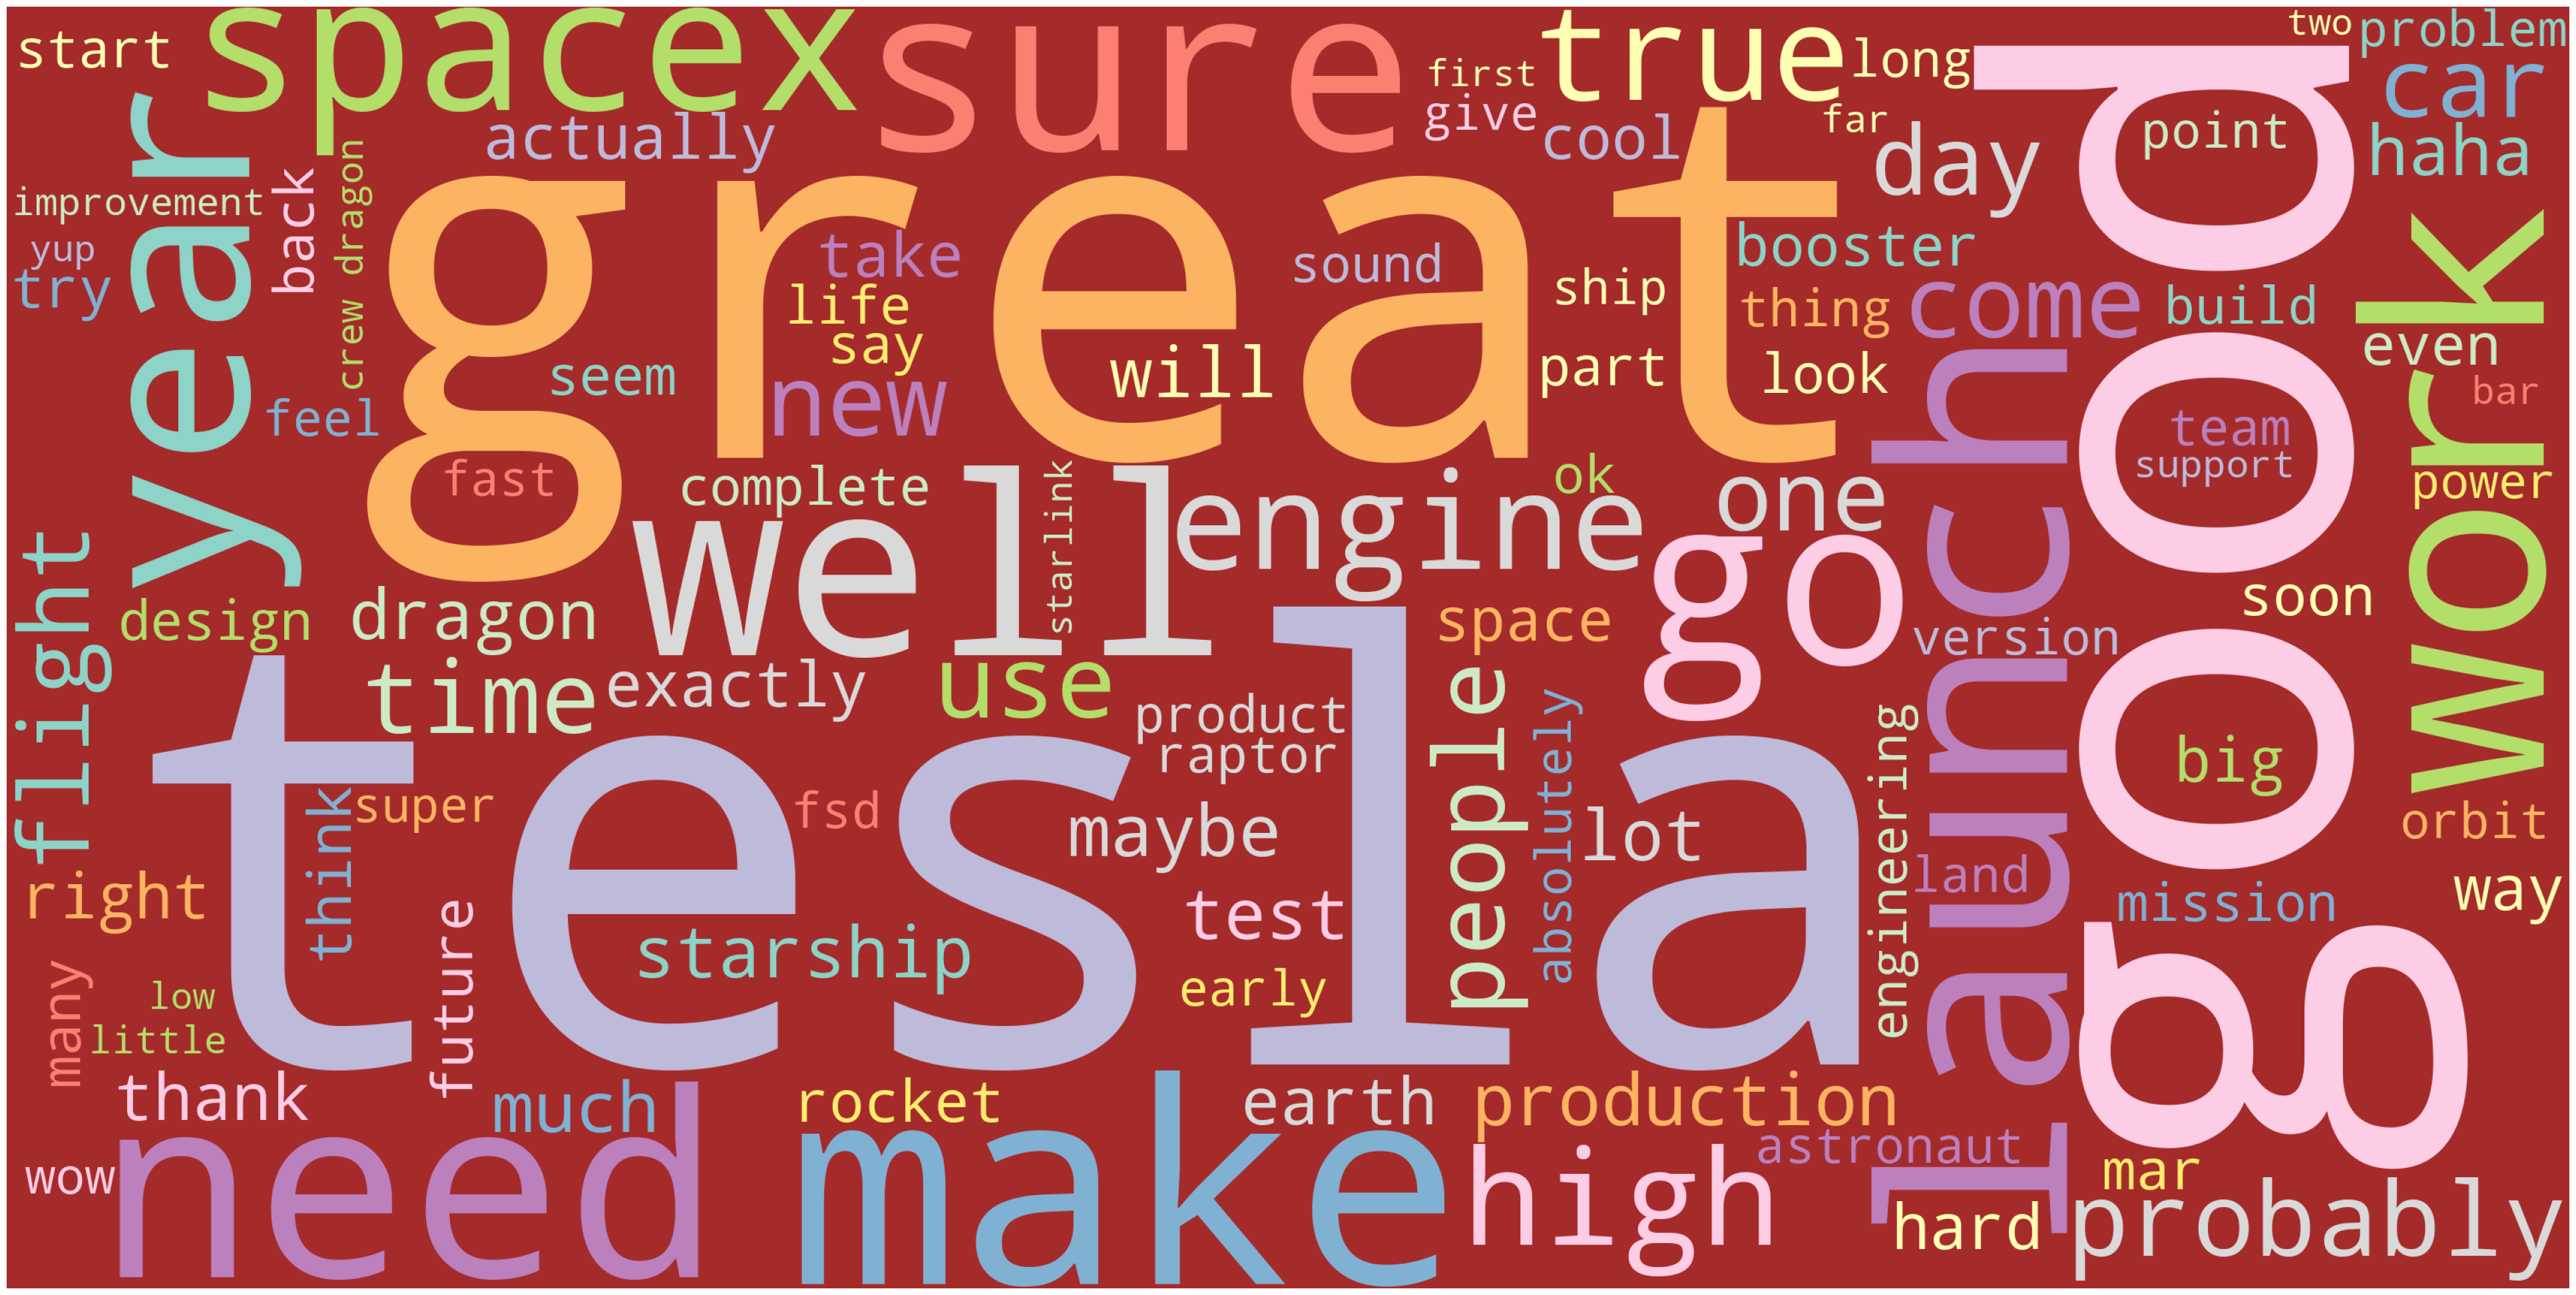

In [296]:
def plot_cloud(workcloud):
    plt.figure(figsize=(50,25))
    plt.imshow(wordcloud_musk_twt)
    plt.axis('off')
    
STOPWORDS.add('rt')
STOPWORDS.add('yeah')

wordcloud_musk_twt=WordCloud(width=3000, height=1500,background_color='brown',max_words=100,colormap='Set3',stopwords=STOPWORDS).generate(musk_tweets2)
plot_cloud(wordcloud_musk_twt)

### Sentiment Analysis and Emotion mining

In [342]:
from nltk import tokenize 
twt_sentences=tokenize.sent_tokenize(' '.join(musk_tweets))
twt_sentences

['@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [343]:
musk_tweets

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [344]:
twt_sentences2=pd.DataFrame(twt_sentences,columns=['sentence'])
twt_sentences2

,sentence
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
912,"@kenyanwalstreet Not actually a payout, just a..."
913,"It may never pay out, as the stock can’t b… ht..."
914,Details Aug 28.
915,AI symbiosis while u wait @vistacruiser7 @flcn...


In [345]:
affin=pd.read_csv('Afinn_words.csv',sep=',', encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [346]:
sentiments_scores_lex=affin.set_index('word')['value'].to_dict()
sentiments_scores_lex

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [347]:
sentiments_scores_lex = affin.set_index('word')['value'].to_dict()
nlp = spacy.load('en_core_web_sm')
sentimt_lex = sentiments_scores_lex 

def calculate_sentiment(text: str = None):
    sentiment_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            lemma = word.lemma_
            sentiment_score += sentiments_scores_lex.get(lemma, 0)
    return sentiment_score

In [348]:
calculate_sentiment(text='abandon')

-2

In [349]:
calculate_sentiment(text='accept')

1

In [350]:
calculate_sentiment(text='underestimated')

-1

In [351]:
# sentence wise sentiment value 
twt_sentences2['sentiment_value']=twt_sentences2['sentence'].apply(calculate_sentiment)
twt_sentences2['sentiment_value'].head(50)

0      0
1      0
2      3
3      3
4      0
5      0
6     -2
7      2
8      0
9      3
10     0
11    -2
12     0
13     0
14     0
15     0
16    -2
17     4
18     0
19     0
20     2
21     0
22     0
23    -3
24     4
25     1
26     1
27     0
28     1
29     3
30     3
31     4
32     2
33     1
34     1
35     3
36    16
37     5
38     3
39     5
40     0
41     2
42     8
43     0
44     0
45     6
46     0
47    -2
48     1
49     0
Name: sentiment_value, dtype: int64

In [352]:
twt_sentences2['sentiment_value'].tail(50)

867    3
868    3
869    0
870    5
871    0
872    0
873    0
874    1
875    2
876    3
877    0
878    0
879    0
880   -2
881   -3
882    1
883    0
884    2
885    6
886    0
887    1
888   -1
889    0
890    2
891    4
892    0
893    0
894    0
895    3
896    7
897    0
898    0
899    3
900    0
901    4
902    4
903    0
904    3
905    0
906    4
907    0
908    3
909    0
910    3
911    2
912    0
913   -4
914    0
915   -2
916    0
Name: sentiment_value, dtype: int64

In [354]:
twt_sentences2['sentiment_value'].describe()

count    917.000000
mean       1.355507
std        2.697262
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [355]:
twt_sentences2[twt_sentences2['sentiment_value']>0]

,sentence,sentiment_value
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2
9,The most entertaining outcome is the most like...,3
17,Back to work I go … @CapybaraSurfer @MattWalla...,4
...,...,...
904,He was one of the very best.,3
906,"@Ali_Afshari In general, we need to improve ho...",4
908,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3
910,This is both great &amp; terrifying.,3


In [356]:
twt_sentences2[twt_sentences2['sentiment_value']<0]

,sentence,sentiment_value
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2
11,"However, if we don… https://t.co/9Z8Ac6skqx @R...",-2
16,That’s what you’re missing.,-2
23,https://t.co/UEEocOfcTb The people have spoken...,-3
47,Would be better to have small fees than no fee...,-2
...,...,...
880,This is primarily an electrical/electronic (ch...,-2
881,Will those who write the algorithms ever reali...,-3
888,No expert installer required.… https://t.co/xn...,-1
913,"It may never pay out, as the stock can’t b… ht...",-4


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22756\212903945.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(twt_sentences2['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

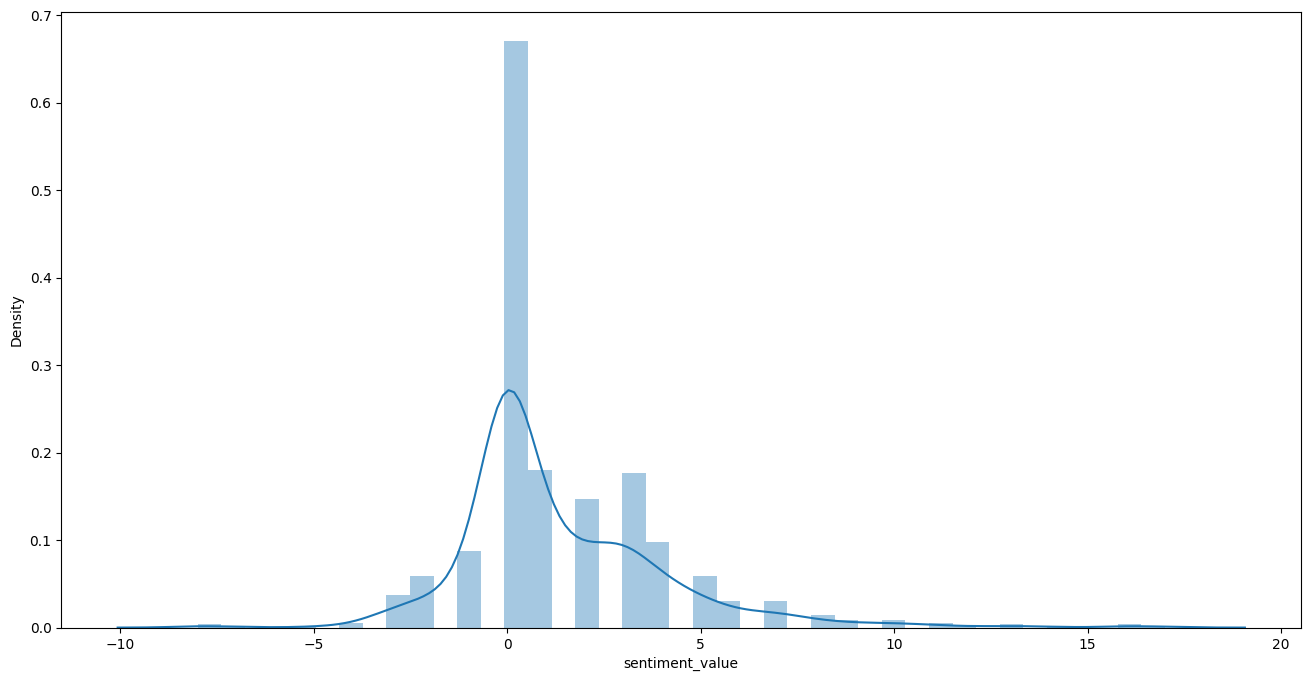

In [358]:
plt.figure(figsize=(16,8))
sns.distplot(twt_sentences2['sentiment_value'])

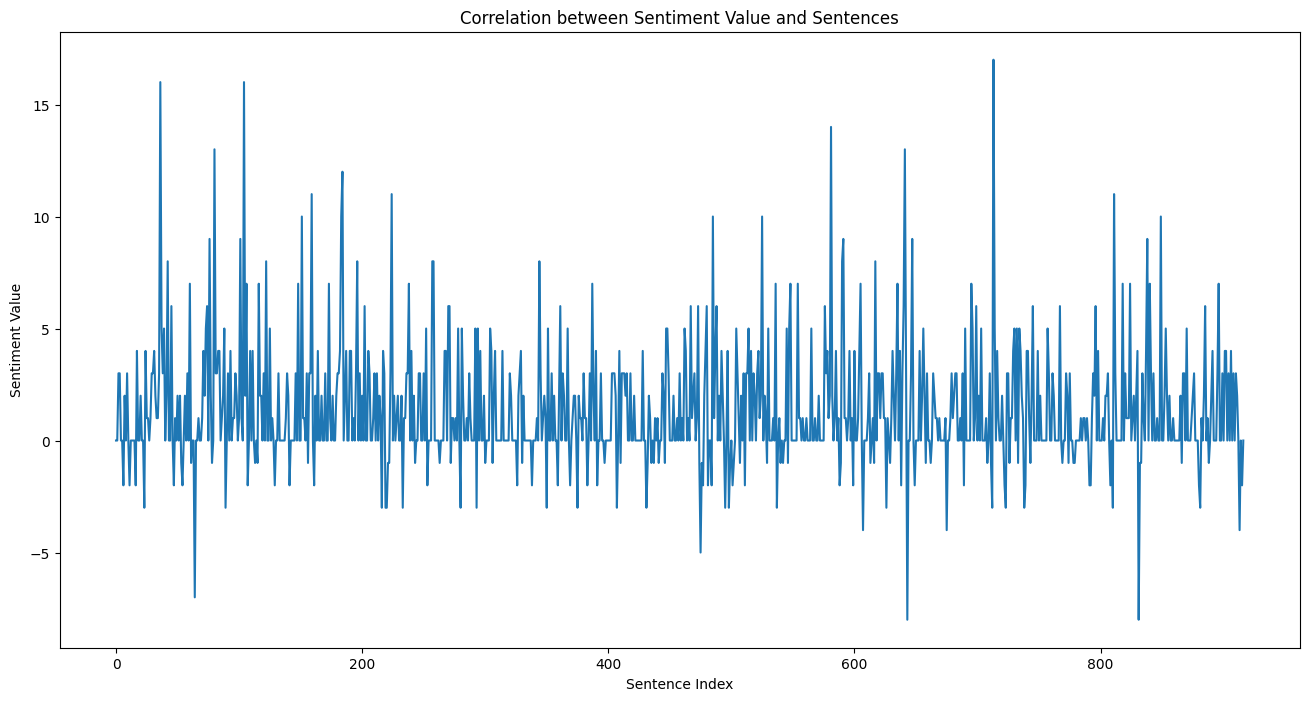

In [361]:
# drawing Correlation 
plt.figure(figsize=(16, 8))
sns.lineplot(y='sentiment_value', x=twt_sentences2.index, data=twt_sentences2)
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Value')
plt.title('Correlation between Sentiment Value and Sentences')
plt.show()

----

---